# Итерационные методы решения СЛАУ

### Постановка задачи:
Пусть известны матрица вещественных чисел $A\in \rm I\!R ^{n*n}$ и вектор правой части $f\in \rm I\!R^n$ уравнения:
$$Ax = f,$$
Требуется найти вектор $x \in \rm I\!R^n$, из этого уравнения.

### Решение:
Так так нижеприведенные методы являются итерационными, перед началом расчетов необходимо выбирать некоторое начальное приближение $x_0$, например, нулевой вектор.

Решение будем искать по-шагово. Промежуточные решения на шагах $k$ и ($k+1$) связываются между собой по следующей формуле:
$$B\frac{x^{k+1}-x^k}{\tau} + Ax^k = f, \quad \quad \quad \quad (*)$$
где $A>0$ исходная матрица, $B-$ невыроденная матрица, зависящая от метода, $\tau-$ итерационный параметр.
Выбирать матрицу $B$ будем так, чтобы ее можно было обратить быстрее, чем матрицу $A$. 

# Метод Якоби

Полагаем $B=D$, а параметр $\tau=1$ ($D-$ диагональная матрица). Тогда выражение $(*)$ будет выглядить следующим образом:
$$D(x^{k+1} - x^k) + (L + D + U)x^k = f.$$
Преобразуем:
$$ Dx^{k+1} + (L+U)x^k = f,$$
или, выписывая поэлементно:
$$ \sum_{j=1}^{i-1} a_{i,j}x_j^k + a_{i,i}x_i^{k+1}+ \sum_{j=i+1}^n a_{i,j}x_j^k = f_i.$$
Эта формула легко разрешается относительно неизвестной $x_i^{k+1}.$ Вычисляя ее при $i=0,...,n$, находим $(k+1)$-ый вектор решения.

My time:  [0.1251676082611084, 0.09675908088684082, 0.21219921112060547, 0.3737506866455078, 0.578859806060791]
lib_time:  [0.0060882568359375, 0.002571582794189453, 0.025382518768310547, 0.013214588165283203, 0.04569721221923828]


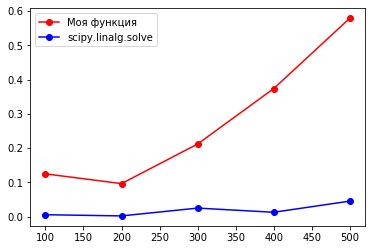

Оценим норму разности решений приведенной функции Якоби и библиотечной функции: 
0.022109042301648958


In [21]:
##### Метод Якоби итерационного решения СЛАУ #####

import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import time
import scipy.linalg

### Функция для вычисления одной итерации
def jacobi(A, f, x):
    n = f.size
    x_new = np.zeros(n)

    for i in range(n):

        tmp = f[i]
        for j in range(n):
            if i != j:
                tmp -= A[i][j] * x[j]
        x_new[i] = tmp / A[i][i]

    return x_new



### Вычисление корней в цикле по заданным начальному приближению
###      и точности

def my_solve(A, f):
    eps = 0.1        # Точность между двумя соседними приближениями
    n = f.size
    x = np.zeros(n)  # начальное приближение
    i = 0            # считаем количество итераций

    while True:
        i = i + 1
        x_new = jacobi(A, f, x)
        a = np.array(x_new)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = x_new[:]

    return x_new


### Трансформация произвольной матрицы в матрицу
        ### с диагональным преобладанием
# Здесь суммируем модули всех элементов строки без диагонального
# Прибавляем эту сумму к диагональному элементу
def diag_domin(A, n):
    for i in range(n):
        s = 0
        for j in range(n):
            if i != j:
                s += abs(A[i][j])
        if (A[i][i] < 0):
            A[i][i] -= s
        else:
            A[i][i] += s
    return A


########## Проверка метода Якоби ##############

"""
 #  Пример из лекций
A = np.array([[2, -1, 0, -1],
              [0, 2, -1, 0],
              [-1, 1, 3, 0],
              [1, 0, -2, 4]])
f = np.array([4, 3, 2, 1])
n = f.size

x = solve(A, f)
print(x)
"""

### Реализация на матрицах 100, 200, 300 ... с диагональным преобладанием
def check_jacobi():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*100 for i in range(1, n+1)]

    for i in range(0, n):
        size = 100 * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag_domin(A, size)  # матрица должна иметь диагональное преобладание

        start_time = time.time()
        lib_x = scipy.linalg.solve(A, f) # библиотечное решение
        end_time = time.time()
        lib_time[i] = end_time - start_time

        start_time = time.time()
        my_x = my_solve(A, f)          # свое решение
        end_time = time.time()
        my_time[i] = end_time - start_time

    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='scipy.linalg.solve')
    plt.legend()

    plt.show()

    print('Оценим норму разности решений приведенной функции Якоби и библиотечной функции: ')
    err = np.linalg.norm(lib_x-my_x)
    print(err)


check_jacobi()

# Метод Зейделя

Полагая $B=L+D$ и $\tau=1$, проделываем выкладки формул, как и в методе Якоби.

My time:  [0.24784350395202637, 0.09918403625488281, 0.22438788414001465, 0.41853928565979004, 0.6215107440948486]
lib_time:  [0.07236456871032715, 0.0027680397033691406, 0.029180526733398438, 0.11627984046936035, 0.08845853805541992]


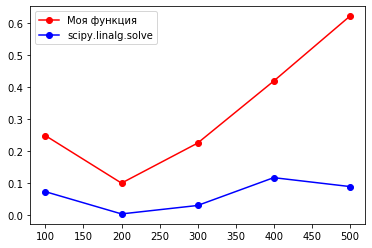

Оценим норму разности решений приведенной функции Зейделя и библиотечной функции: 
0.0222112624287129


In [22]:
##### Метод Зейделя итерационного решения СЛАУ #####

import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg


def seidel(A, f, x):

    n = f.size
    x_new = np.zeros(n)

    for i in range(n):
        s = 0
        for j in range(i):
            s = s + A[i][j] * x_new[j]
        for j in range(i+1, n):
            s = s + A[i][j] * x[j]
        x_new[i] = (f[i] - s) / A[i][i]

    return x_new



def my_solve(A, f):
    eps = 0.1        # Точность между двумя соседними приближениями
    n = f.size
    x = np.zeros(n)  # начальное приближение
    i = 0            # считаем количество итераций

    while True:
        i = i + 1
        x_new = jacobi(A, f, x)
        a = np.array(x_new)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = x_new[:]

    return x_new


def diag_domin(A, n):
    for i in range(n):
        s = 0
        for j in range(n):
            if i != j:
                s += abs(A[i][j])
        if (A[i][i] < 0):
            A[i][i] -= s
        else:
            A[i][i] += s
    return A


########## Проверка метода Зейделя ###############

"""
 #  Пример из лекций
A = np.array([[2, -1, 0, -1],
              [0, 2, -1, 0],
              [-1, 1, 3, 0],
              [1, 0, -2, 4]])
f = np.array([4, 3, 2, 1])
n = f.size

x = solve(A, f)
print(x)
"""

### Реализация на матрицах 100, 200, 300 ... с диагональным преобладанием
def check_seidel():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*100 for i in range(1, n+1)]  # шаги - порядок матриц

    for i in range(0, n):
        size = 100 * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag_domin(A, size)  # матрица должна иметь диагональное преобладание

        start_time = time.time()
        lib_x = np.linalg.solve(A, f) # библиотечное решение
        end_time = time.time()
        lib_time[i] = end_time - start_time

        start_time = time.time()
        my_x = my_solve(A, f)          # свое решение
        end_time = time.time()
        my_time[i] = end_time - start_time

    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='scipy.linalg.solve')
    plt.legend()

    plt.show()

    print('Оценим норму разности решений приведенной функции Зейделя и библиотечной функции: ')
    err = np.linalg.norm(lib_x-my_x)
    print(err)

    # варьируя eps, мы изменяем точность. Здесь время счета для eps=0.01 и eps=0.001
                    # почти одинаково, поэтому для улучшения точности примем eps=0.001
    

check_seidel()

Как мы можем наблюдать, скорость решения библиотечных функций на порядок превышает скорость решения наших методов.
### Но как работают описанные нами методы Якоби и Зейделя в сравнении друг с другом?
Проанализируем результат на тех же порядках матриц.

In [23]:
def my_jacobi(A, f):
    eps = 0.1        # Точность между двумя соседними приближениями
    n = f.size
    x = np.zeros(n)  # начальное приближение
    i = 0            # считаем количество итераций

    while True:
        i = i + 1
        x_new = jacobi(A, f, x)
        a = np.array(x_new)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = x_new[:]

    return x_new

In [24]:
def my_seidel(A, f):
    eps = 0.1        # Точность между двумя соседними приближениями
    n = f.size
    x = np.zeros(n)  # начальное приближение
    i = 0            # считаем количество итераций

    while True:
        i = i + 1
        x_new = jacobi(A, f, x)
        a = np.array(x_new)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = x_new[:]

    return x_new


In [25]:
def check_both():
    n = 5
    my_time1 = [0] * n
    my_time2 = [0] * n
    steps = [i*100 for i in range(1, n+1)]  # шаги - порядок матриц

    for i in range(0, n):
        size = 100 * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag_domin(A, size)  # матрица должна иметь диагональное преобладание

        start_time = time.time()
        my_x1 = my_jacobi(A, f)
        end_time = time.time()
        my_time1[i] = end_time - start_time

        start_time = time.time()
        my_x2 = my_seidel(A, f)
        end_time = time.time()
        my_time2[i] = end_time - start_time

    print('Jacobi: ', my_time1)
    print('Seidel: ', my_time2)

    plt.plot(steps, my_time1, 'ro-', label='Jacobi')
    plt.plot(steps, my_time2, 'bo-', label='Seidel')
    plt.legend()

    plt.show()

Jacobi:  [0.05281639099121094, 0.10359597206115723, 0.23628973960876465, 0.3981757164001465, 0.6595644950866699]
Seidel:  [0.05488944053649902, 0.10375308990478516, 0.22591567039489746, 0.402388334274292, 0.6372530460357666]


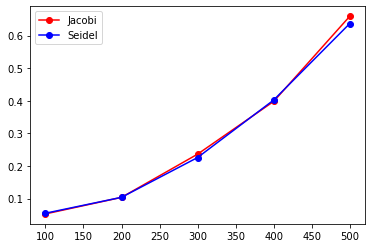

In [26]:
check_both()

Скорости вычисления решений методами Якоби и Зейделя почти одинаковы. 